Ordinary Least Squares Regression code and subsequent coeffcient visualisation

In [ ]:
#importing libraries
import pandas as pd
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#load data
df = pd.read_parquet("../datasets/processed.parquet")

#make model
model = smf.ols(
    formula="ratio ~ rain + temp + C(hour) + rain*rushhour + rain*weekend",
    data=df
    ).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     828.9
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:34:03   Log-Likelihood:                 18562.
No. Observations:                9528   AIC:                        -3.706e+04
Df Residuals:                    9498   BIC:                        -3.685e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1464      0.002     80.477

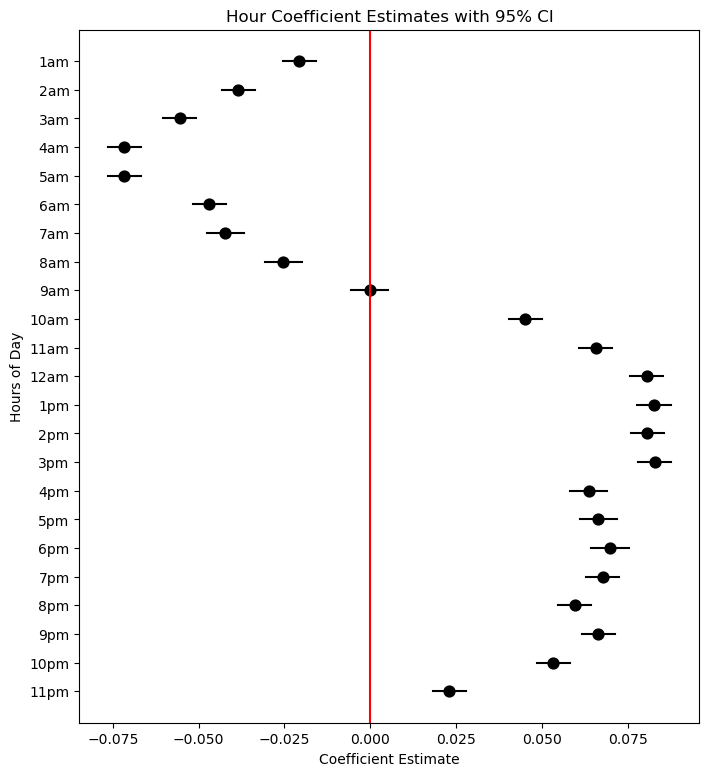

In [106]:
#creating coeefceint plot

# extract coefficients
coefs = model.params


#get confidence intervals
ci = model.conf_int()
ci.columns = ["lower", "upper"]

#combine into a graphable dataframe
gdf = pd.concat([coefs, ci], axis=1)
gdf.columns = ["coef", "lower", "upper"]
gdf = gdf.reset_index().rename(columns={"index": "variable"})

#removing intercept for visualisation and interperetability.
gdf = gdf[gdf['variable'] != 'Intercept']

#renaming parameters for graph
newParam = ['1am', '2am', '3am', '4am','5am','6am','7am','8am','9am','10am','11am','12am',
            '1pm', '2pm', '3pm', '4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm',
            'rain', 'temperature', 'rushhour', 'rain:rushhour', 'weekend', 'rain:weekend']

gdf['variable'] = newParam

#seperating hour from other variables for clearer graphs
hourDF = gdf.iloc[:23].copy()
otherDF = gdf.iloc[23:].copy()

# plot
plt.figure(figsize=(8, 9))
sns.pointplot(
    data=hourDF,
    x="coef", y="variable",
    color="black",
    linestyle='none')

# add error bars from CIS
for i, row in hourDF.iterrows():
    plt.plot([row["lower"], row["upper"]], [i-1, i-1], color="black")

#add 0 line
plt.axvline(0, color="red")

plt.title("Hour Coefficient Estimates with 95% CI")
plt.xlabel("Coefficient Estimate")
plt.ylabel("Hours of Day")
plt.show()

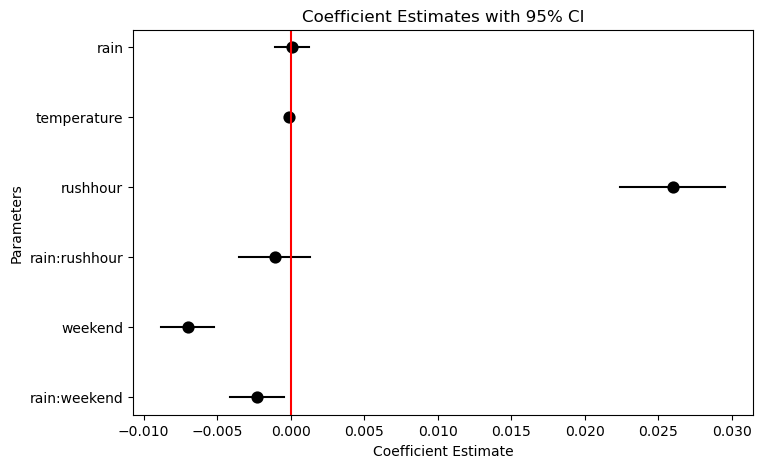

In [107]:
plt.figure(figsize=(8, 5))
sns.pointplot(
    data=otherDF,
    x="coef", y="variable",
    color="black",
    linestyle='none')

# add error bars from CIS
for i, row in otherDF.iterrows():
    plt.plot([row["lower"], row["upper"]], [i-24, i-24], color="black")

#add 0 line
plt.axvline(0, color="red")

plt.title("Coefficient Estimates with 95% CI")
plt.xlabel("Coefficient Estimate")
plt.ylabel("Parameters")
plt.show()